In [24]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from math import *
from matplotlib import pylab as plt
%matplotlib inline

## Teorema central del límite

Vimos que bajo algunas propiedades muy generales, la suma de $N$ variables aleatorias independientes, $x_1, x_2, ..., x_N$ sigue una distribución normal, en el límite $N \rightarrow \infty$. Esto es el teorema central del límite.
$$
z = \sum_i x_i\;\;.
$$

Además, el valor de expectación y la varianza de $z$ es la suma de los valores de expectación $\mu_i$ y varianzas $\sigma^2_i$.

$$
\mathbb{E}[z] = \sum_i \mu_i\\
\mathrm{var}[z] = \sum_i \sigma_i^2
$$

Una de las bellezas de tener una computadora es que uno puede ver esto de primera mano. Vamos a visualizar la forma en la que $z$ está distribuida.

<b>Nota</b>: obviamente, esto no es una demostración del Teorema Central del Límite.

Veamos primero una forma muy poco pythonica de hacerlo

Tengo 1000 muestras de z


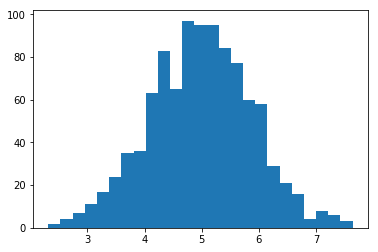

In [39]:
import numpy.random as rr

# Quiero generar muestras de $z$ para hacer un histograma
# Cada muestra será la suma de n variables uniformes independientes
nsample = 1000
n = 10

# inicializo lista
z = []

for i in range(nsample):
    s = rr.random(n)
    z.append(np.sum(s))
    
# Fíjense que son 1000 muestras de z
print('Tengo {} muestras de z'.format(len(z)))

# Ahora lo ploteo
h = plt.hist(z, 25)

La variable z debería tener media igual a la suma de las medias y varianza igual a la suma de las varianzas.
Estamos sumando variables uniformes en [0, 1], $x_i$, para las cuales tenemos (ver Apéndice B del Bishop)

$$
\mathbb{E}[x] = \frac{a + b}{2} = 0.5
\mathrm{var}[x] = \frac{(b - a)^2)}{12} = 1/12
$$

Como estamos sumando diez variables i.i.d., deberíamos tener
$$
\mathbb{E}[z] = 10 \times 0.5 = 5.0\\
\mathrm{var}[x] = 10 \times \frac{1}{12} = \frac{10}{12}
$$

Verifiquemos esto:

In [40]:
# La variable z debería tener media igual a la suma de las medias y varianza igual a la suma de las varianzas.
# Verifiquemos eso de dos maneras.

print('Valor medio: {}'.format(np.mean(z)))
print('12 * Varianza: {}'.format(12 * np.var(z)))

Valor medio: 4.986454391882853
12 * Varianza: 9.652559049693899


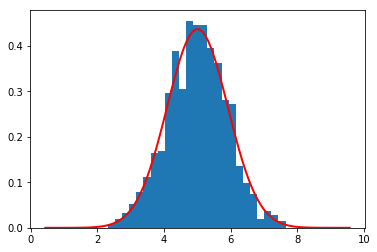

In [41]:
import scipy.stats as st

# Repitamos el plot, pero esta vez normalizando el histograma
h = plt.hist(z, 25, normed=True)

mz = np.mean(z)
vz = np.var(z)

# Agregemos un gráfico de una pdf normal con los valores esperados de valor medio y varianza
zmean = n * 0.5
zvar = n / 12

# Creo el array para graficar
x = np.linspace(zmean - 5*sqrt(zvar), zmean + 5*sqrt(zvar), 100)

plt.plot(x, st.norm(zmean, sqrt(zvar)).pdf(x), color='r', lw=2)

Repitamos para una suma de más variables, y esta vez hagamos un par de trucos para simplificarnos la vida.

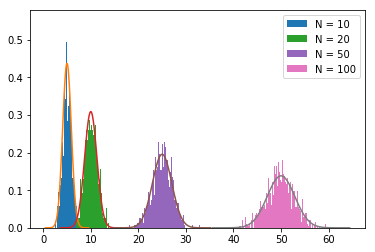

In [42]:
# Creamos primero las variables aleatorias que vamos a usar (1000 muestras de tamaño nsample)
x = rr.rand(500, nsample)

sizes = [10, 20, 50, 100]

for s in sizes:
    z = x[:s].sum(axis=0)
    
    zmean = s * 0.5
    zvar =  s / 12
    
    plt.hist(z, 100, normed=True, label='N = {}'.format(s))
    
    # Define adequate array
    xx = np.linspace(zmean - 5*sqrt(zvar), zmean + 5*sqrt(zvar), 100)
    plt.plot(xx, st.norm(zmean, sqrt(zvar)).pdf(xx))
    
plt.legend(loc=0)

Ahora les toca a ustedes jugar un rato. Prueben hacer los mismo con otras distribuciones que hayamos visto (binomial, poisson, etc.) y ver si llegan a resultados parecidos.

***

### Preguntas

<ul>    <li> ¿La convergencia a la normal es igual para todas las distribuciones?</li>
    <li> ¿Qué pasa si mezclo variables de distintas distribuciones?</li>
    </ul>

***

## Mixtura de Gaussianas
<a id='mixtures'></a>

Vimos que uno de las ventajas de las propiedades analíticas de las Gaussianas es que sirven como elementos de modelos más complejos. 

Una técnica para hacer esto es la mixtura de Gaussianas, que nos permite captar mucha más complejidad que una simple normal. Vamos un ejemplo.